In [ ]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

## Data Collection and Outlier Detection

In [1]:
# Define the API key and base URL
api_key = 'beBybSi8daPgsTp5yx5cHtHpYcrjp5Jq'
base_url = 'https://api.polygon.io/v2/aggs/ticker/'

# Define the currency pairs and years
currency_pairs = ['C:USDEUR', 'C:USDCAD', 'C:USDINR']
years = range(2010, 2024)

# Dictionaries to hold the dataframes for each currency pair
full_data = {}
outliers_data = {}

# Loop over each currency pair
for pair in currency_pairs:
    # Initialize a DataFrame to store all data for the current currency pair
    full_data[pair] = pd.DataFrame()
    # Initialize a DataFrame to store all outliers for the current currency pair
    outliers_data[pair] = pd.DataFrame()
    
    # Loop over each year
    for year in years:
        # Format the API endpoint
        start_date = f'{year}-01-01'
        end_date = f'{year}-12-31'
        url = f"{base_url}{pair}/range/1/day/{start_date}/{end_date}?adjusted=true&sort=asc&apiKey={api_key}"
        
        # Make the API request
        response = requests.get(url)
        data = response.json()
        
        # Check if the request was successful
        if response.status_code == 200 and 'results' in data:
            # Load data into a DataFrame
            df = pd.DataFrame(data['results'])
            
            # Append the data to the full_data DataFrame for the current currency pair
            df['year'] = year
            full_data[pair] = pd.concat([full_data[pair], df], ignore_index=True)
            
            # Find the top 10 outliers based on absolute values of the close price
            df['abs_close'] = df['c'].abs()
            outliers = df.nlargest(10, 'abs_close')
            
            # Drop the 'abs_close' column used for sorting
            outliers = outliers.drop(columns=['abs_close'])
            
            # Append outliers to the outliers_data DataFrame for the current currency pair
            outliers['year'] = year
            outliers_data[pair] = pd.concat([outliers_data[pair], outliers], ignore_index=True)

In [2]:
# Each currency pair now has its own DataFrame for all data and outliers
# full_data and outliers_data are dictionaries where the keys are the currency pair codes
# For example, to access the full data for USDEUR from 2010 to 2023:
full_data['C:USDEUR'], full_data['C:USDCAD'], full_data['C:USDINR']
# To access outliers for USDEUR:
outliers_data['C:USDEUR'], outliers_data['C:USDCAD'], outliers_data['C:USDINR']

In [5]:
full_data['C:USDINR']

,v,vw,o,c,h,l,t,n,year
0,165,46.6245,46.6000,46.6100,46.6450,46.6000,1262304000000,165,2010
1,81,46.4922,46.6100,46.4800,46.6100,46.4550,1262476800000,81,2010
2,803,46.3741,46.4750,46.2275,46.5280,46.2150,1262563200000,803,2010
3,836,46.1682,46.2325,46.0800,46.2680,46.0400,1262649600000,836,2010
4,974,46.0207,46.0850,45.7800,46.1880,45.7000,1262736000000,974,2010
...,...,...,...,...,...,...,...,...,...
4425,12031,83.1632,83.1724,83.1828,83.3461,83.0621,1703548800000,12031,2023
4426,14569,83.2694,83.2027,83.2682,83.3745,83.1206,1703635200000,14569,2023
4427,15691,83.2028,83.2672,82.8908,83.3712,80.2249,1703721600000,15691,2023
4428,20955,83.1929,83.1450,82.8993,83.3629,82.1219,1703808000000,20955,2023


In [6]:
outliers_data['C:USDCAD']

,v,vw,o,c,h,l,t,n,year
0,93404,1.0677,1.06061,1.07263,1.07507,1.05978,1265241600000,93404,2010
1,86711,1.0696,1.07000,1.07188,1.07723,1.06552,1265587200000,86711,2010
2,162976,1.0772,1.06966,1.07008,1.08535,1.06421,1274745600000,162976,2010
3,6223,1.0711,1.06807,1.07000,1.07274,1.06782,1265500800000,6223,2010
4,114754,1.0716,1.07263,1.06983,1.07797,1.06419,1265328000000,114754,2010
...,...,...,...,...,...,...,...,...,...
135,155116,1.3875,1.38770,1.38344,1.38987,1.38321,1698796800000,155116,2023
136,166655,1.3796,1.37994,1.38300,1.38370,1.37510,1678320000000,166655,2023
137,129647,1.3841,1.38633,1.38300,1.38663,1.37573,1698624000000,129647,2023
138,163933,1.3817,1.38026,1.38150,1.38460,1.37870,1698278400000,163933,2023


## Visualizing the full data with it's outliers

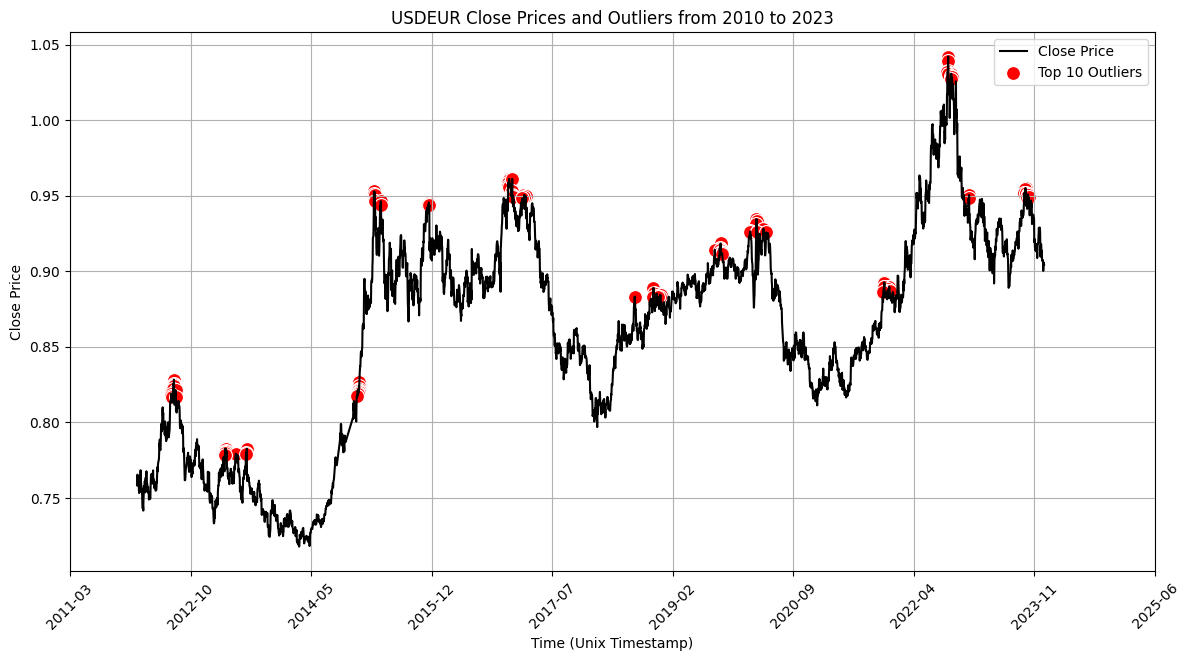

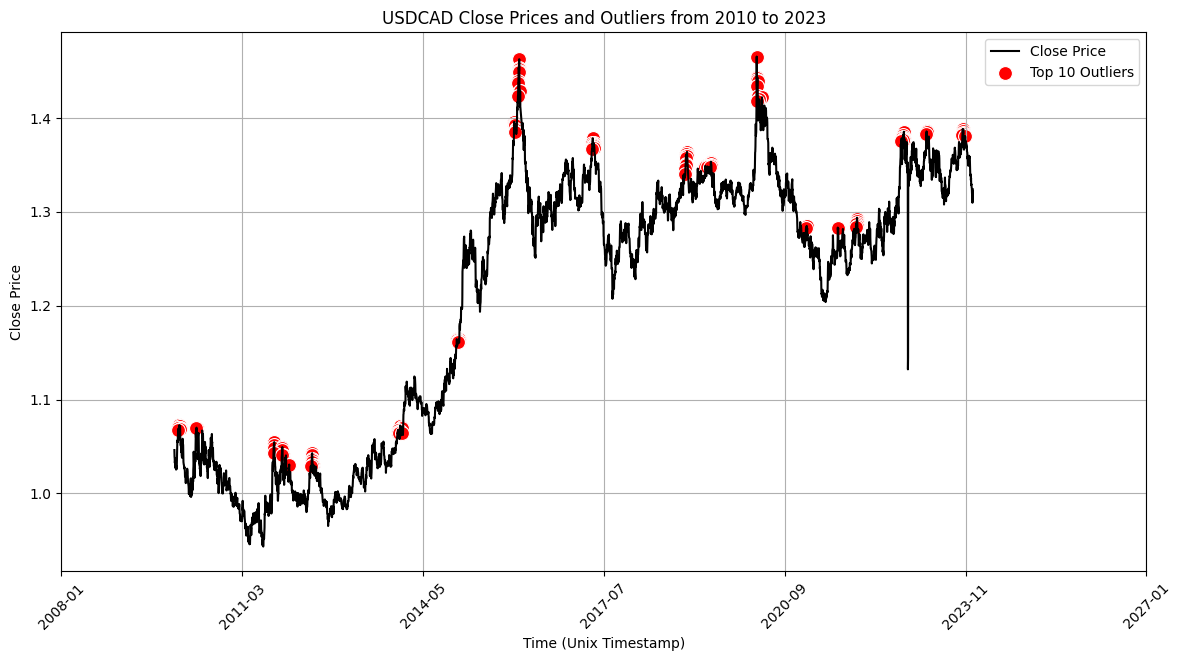

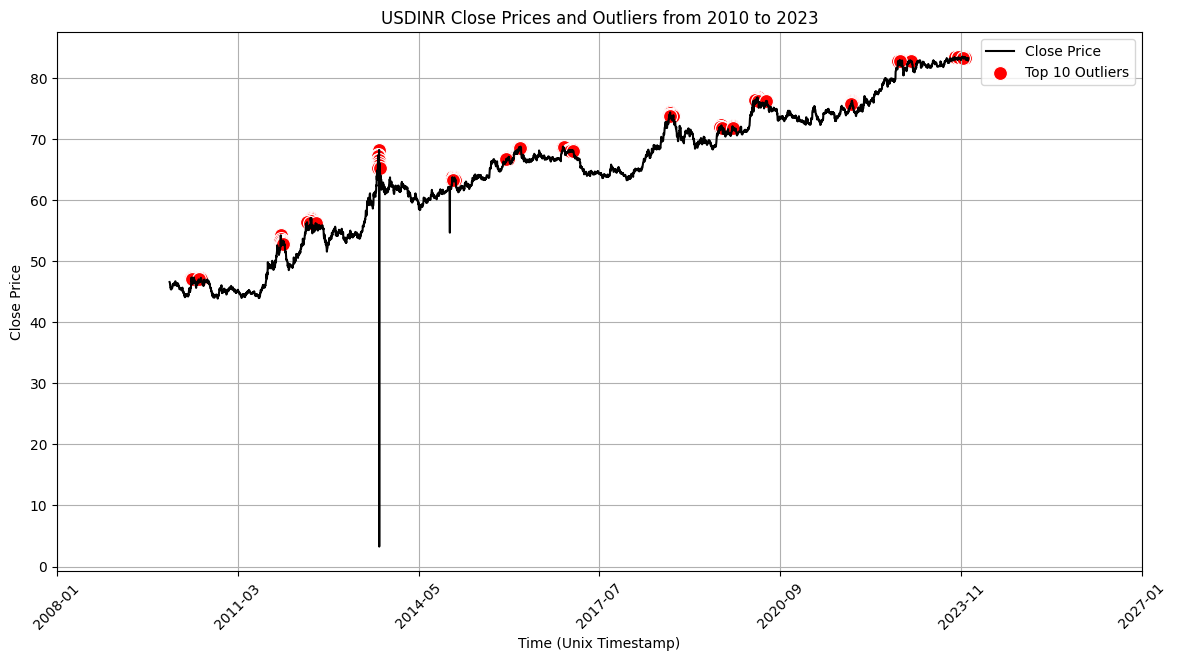

In [9]:
# Function to plot data and outliers for a single currency pair
def plot_currency_data(full_df, outliers_df, currency_pair):
    plt.figure(figsize=(14, 7))
    
    # Plot the full data
    sns.lineplot(x='t', y='c', data=full_df, label='Close Price', color='black')
    
    # Plot the outliers
    sns.scatterplot(x='t', y='c', data=outliers_df, color='red', label='Top 10 Outliers', s=100)
    
    # Formatting the plot
    plt.title(f'{currency_pair[2:]} Close Prices and Outliers from 2010 to 2023')
    plt.xlabel('Time (Unix Timestamp)')
    plt.ylabel('Close Price')
    plt.legend()
    plt.grid(True)
    
    # Convert Unix timestamp to readable dates
    plt.xticks(ticks=plt.xticks()[0], labels=pd.to_datetime(plt.xticks()[0], unit='ms').strftime('%Y-%m'))
    
    # Rotate date labels for better visibility
    plt.xticks(rotation=45)
    
    # Show the plot
    plt.show()

# Plot data for each currency pair
for pair in currency_pairs:
    plot_currency_data(full_data[pair], outliers_data[pair], pair)